In [3]:
#Prediction using Unsupervised Learning
#Importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
#Load the iris dataset
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#Finding the optimum number of clusters for k-means classification
x=iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

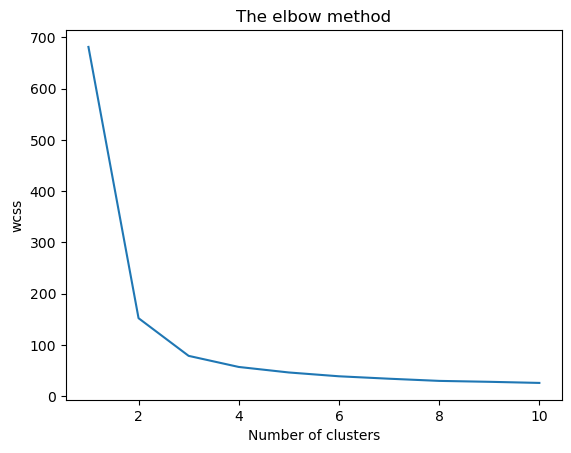

In [8]:
#Plotting the results onto a line graph,
#allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') #within cluster sum of squares
plt.show()

In [9]:
#As we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the cluster occurs. This is when the within cluster sum of squares (wcss) doesn't decrease significantly with every iteration.

In [10]:
#From this we choose the number of clusters as **'4**'.

In [13]:
#Applying kmeans to the dataset/creating the kmeans classifier
kmeans= KMeans(n_clusters =4, init = 'k-means++',
              max_iter = 300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


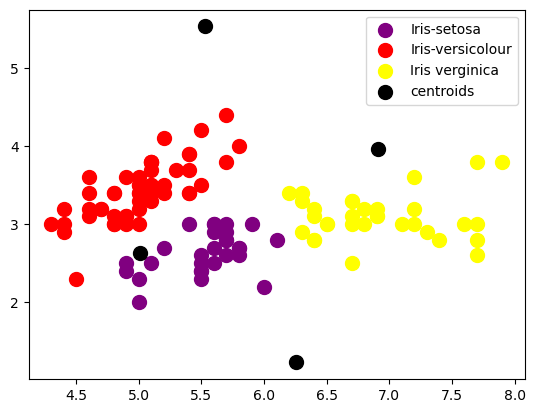

In [14]:
#Visualising the clusters - on the first two columns.
plt.scatter(x[y_kmeans ==0,0],x[y_kmeans ==0,1],
           s = 100, c ='purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans ==1,1],
           s = 100, c= 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans ==2,1],
           s = 100, c= 'yellow', label = 'Iris verginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:1],
           s=100, c= 'black', label='centroids')
plt.legend()

In [ ]:
#The k-means workshop has ended.